# Proyecto Modulo 1

dataset:
https://www.kaggle.com/airbnb/seattle

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gmplot
import geopandas as gpd
import shapely
from shapely.geometry import *

import plotly

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.express as px

import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from scipy import stats
import scipy

import statsmodels.api as sm

from IPython.core.display import display, HTML
%matplotlib inline

In [31]:
calendario = pd.read_csv("calendar.csv")

In [32]:
listado = pd.read_csv("listings.csv")

## Analisis primer dataset

In [33]:
calendario.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [34]:
len(calendario["listing_id"].unique())

3818

In [35]:
len(calendario["date"].unique())

365

In [36]:
calendario["available"].unique()

array(['t', 'f'], dtype=object)

In [37]:
# Cambiamos t y f por 1 y 0 para hacer más comodos los datos:
calendario["available"] = calendario["available"].replace("f", 0)
calendario["available"] = calendario["available"].replace("t", 1)
calendario["price"] = calendario["price"].str.replace("$","")
calendario["price"] = calendario["price"].str.replace(",","")
calendario["price"] = pd.to_numeric(calendario["price"])
calendario['month'] = pd.DatetimeIndex(calendario["date"]).month

In [38]:
calendario.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [39]:
# Agrupamos los datos por la fecha y añadimos una columna con el día y otra para el mes
disponibilidad = calendario[["available", "date"]].groupby("date").sum()
disponibilidad["day"] = np.arange(0, 365)
disponibilidad

,available,day
date,,
2016-01-04,1735,0
2016-01-05,1867,1
2016-01-06,1826,2
2016-01-07,1776,3
2016-01-08,1782,4
...,...,...
2016-12-29,2835,360
2016-12-30,2840,361
2016-12-31,2859,362


In [40]:
disponibilidad_mes = calendario[["available", "month"]].groupby("month").sum()
disponibilidad_mes

,available
month,
1,64937
2,73321
3,83938
4,76037
5,79971
6,77244
7,74222
8,76347
9,77246


In [41]:
# De forma similar, miramos la media de precios a lo largo del año
precios = calendario.dropna()
precios_dia = precios[["price", "date"]].groupby("date").mean()
precios_dia["day"] = np.arange(0, 365)
precios_dia

,price,day
date,,
2016-01-04,122.085879,0
2016-01-05,120.681307,1
2016-01-06,120.928258,2
2016-01-07,120.958896,3
2016-01-08,127.640853,4
...,...,...
2016-12-29,138.045503,360
2016-12-30,144.738380,361
2016-12-31,145.698146,362


In [42]:
precios_mes = precios[["price", "month"]].groupby("month").mean()
precios_mes

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


Text(0.5, 33.00000000000005, 'Mes')

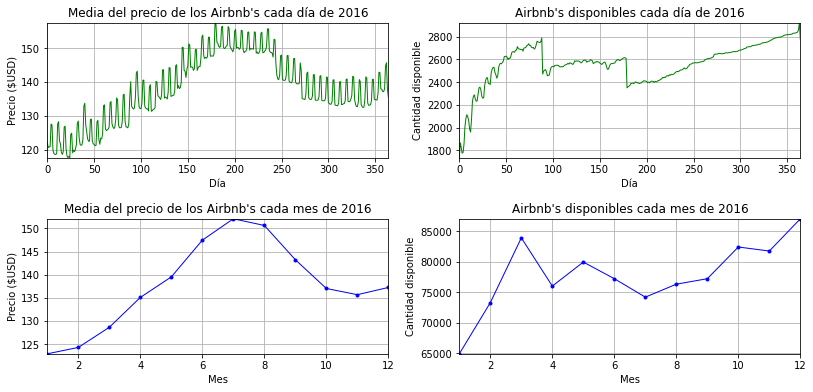

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)
axes[0][0].plot(precios_dia["day"], precios_dia["price"], 'g-',linewidth=1)
axes[0][0].grid()
axes[0][0].autoscale(axis='both', tight=True)
axes[0][0].set_title("Media del precio de los Airbnb's cada día de 2016")
axes[0][0].set_ylabel("Precio ($USD)")
axes[0][0].set_xlabel("Día")

axes[1][0].plot(precios_mes.index, precios_mes["price"], 'b.-',linewidth=1)
axes[1][0].grid()
axes[1][0].autoscale(axis='both', tight=True)
axes[1][0].set_title("Media del precio de los Airbnb's cada mes de 2016")
axes[1][0].set_ylabel("Precio ($USD)")
axes[1][0].set_xlabel("Mes")

axes[0][1].plot(disponibilidad["day"], disponibilidad["available"], 'g-',linewidth=1)
axes[0][1].grid()
axes[0][1].autoscale(axis='both', tight=True)
axes[0][1].set_title("Airbnb's disponibles cada día de 2016")
axes[0][1].set_ylabel("Cantidad disponible")
axes[0][1].set_xlabel("Día")

axes[1][1].plot(disponibilidad_mes.index, disponibilidad_mes["available"], 'b.-',linewidth=1)
axes[1][1].grid()
axes[1][1].autoscale(axis='both', tight=True)
axes[1][1].set_title("Airbnb's disponibles cada mes de 2016")
axes[1][1].set_ylabel("Cantidad disponible")
axes[1][1].set_xlabel("Mes")

In [44]:
weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
precios_dia["day_week"] = pd.DatetimeIndex(precios_dia.index).dayofweek
precios_dia_semana = precios_dia[["price", "day_week"]].groupby("day_week", as_index=False).mean()
precios_dia_semana['day_week'] = precios_dia_semana['day_week'].replace([0, 1, 2, 3, 4, 5, 6], weekDays)
precios_dia_semana

,day_week,price
0,Lunes,135.637263
1,Martes,135.379666
2,Miercoles,135.407384
3,Jueves,136.382791
4,Viernes,142.964759
5,Sabado,143.120562
6,Domingo,136.463607


Text(0.5, 0, 'Día de la semana')

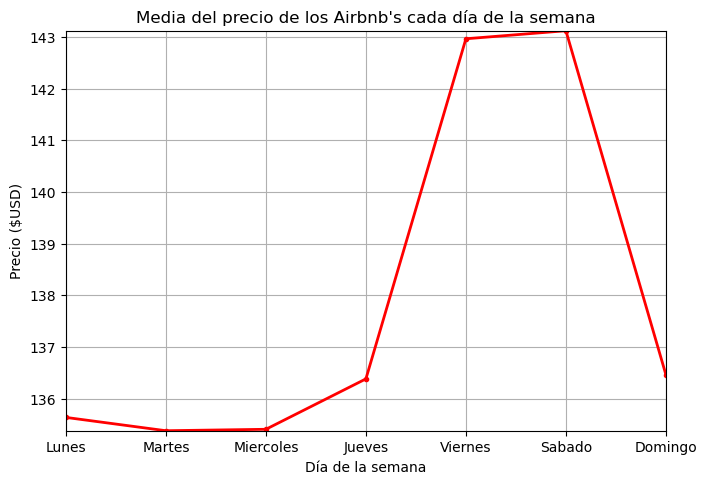

In [45]:
fig = plt.figure(dpi=100)
axes = fig.add_axes([0,0,1,1])
axes.plot( precios_dia_semana["day_week"], precios_dia_semana["price"], 'r.-',linewidth=2)
axes.grid()
axes.autoscale(axis='both', tight=True)
axes.set_title("Media del precio de los Airbnb's cada día de la semana")
axes.set_ylabel("Precio ($USD)")
axes.set_xlabel("Día de la semana")

In [46]:
#Por ultimo miramos cuales fueron los Airbnb's más ocupados a lo largo del año
ocupacion = calendario[["available", "listing_id"]].groupby("listing_id").sum()
day = np.arange(0, 365)
ocupacion.reset_index(inplace=True)
ocupacion.rename(columns={"listing_id": "id"}, inplace = True)
ocupacion

,id,available
0,3335,309
1,4291,365
2,5682,309
3,6606,365
4,7369,53
...,...,...
3813,10332096,365
3814,10334184,361
3815,10339144,0
3816,10339145,365


Text(0.5, 0, 'Días disponibles')

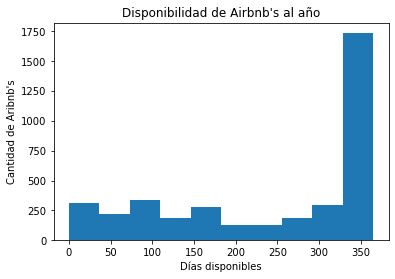

In [47]:
plt.hist(ocupacion["available"]);
plt.title("Disponibilidad de Airbnb's al año")
plt.ylabel("Cantidad de Aribnb's")
plt.xlabel("Días disponibles")

### Concluciones del calendario

1. Se observa que durante los meses de verano la demanda de airbnb's es mucho más alta, algo que es evidente. Sin embargo, se observa que durante la festividades de fin de año del 2016 la demanda minima, algo que no se esperaba pues los viajes son frecuentes en esta epoca.
2. De manera similar, el precio aumenta junto con la demanda, algo que es evidente. Pero tambien se observa que los días Viernes y Sabado se eleva el precio en aproximadamente 8 usd.
3. En el histograma de ocupación se observa que la mayoria de los airbnb's estan disponibles casi todo el año. Con el siguiente dataset se buscará la correlación entre las distintas variables con la disponibilidad del airbnb al año.

In [48]:
listado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [49]:
# Creamos copia del dataset
listado_copia = listado.copy()
# Eliminamos variables redundantes o inecesarias del dataset
innecesario = ["country","country_code","thumbnail_url","medium_url","picture_url","xl_picture_url","host_url","listing_url",
               "license", "jurisdiction_names", "last_review","first_review","has_availability","description","last_scraped",
               "city","state","market","calendar_last_scraped","neighbourhood_cleansed","calendar_updated","space","summary",
               "name","neighborhood_overview","host_id","host_name","host_location","host_about","host_response_time","zipcode",
               "host_response_rate","host_acceptance_rate","host_thumbnail_url","host_picture_url","host_neighbourhood",
               "host_listings_count","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified",
               "street", "host_since", "host_is_superhost", "neighbourhood_group_cleansed", "smart_location","amenities",
               "calculated_host_listings_count","require_guest_phone_verification","require_guest_profile_picture","review_scores_communication",
               "review_scores_checkin","review_scores_cleanliness","review_scores_accuracy","number_of_reviews","availability_30",
               "availability_60","availability_90","availability_365", "requires_license", "reviews_per_month","instant_bookable",
               "review_scores_value","weekly_price","monthly_price","transit","notes","square_feet","cleaning_fee",
               "security_deposit","experiences_offered","scrape_id","maximum_nights","review_scores_rating"]
for i in range(len(innecesario)):
    listado_copia.pop(innecesario[i])

listado_copia = pd.merge(listado_copia,ocupacion,on='id')
listado_copia["price"] = listado_copia["price"].str.replace("$","")
listado_copia["price"] = listado_copia["price"].str.replace(",","")
listado_copia["price"] = pd.to_numeric(listado_copia["price"])
listado_copia.head()

,id,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,available
0,241032,Queen Anne,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,2,$5.00,1,9.0,moderate,346
1,953595,Queen Anne,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,1,$0.00,2,10.0,strict,291
2,3308979,Queen Anne,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,10,$25.00,4,10.0,strict,220
3,7421966,Queen Anne,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,1,$0.00,1,NaN,flexible,143
4,278830,Queen Anne,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,6,$15.00,1,9.0,strict,365


In [74]:
true_location = listado_copia[listado_copia["is_location_exact"]=="t"].dropna()

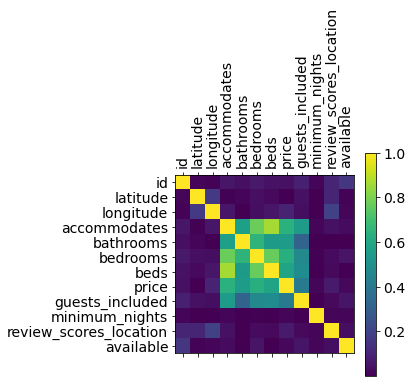

In [78]:
plt.matshow(abs(true_location.corr()))
plt.xticks(range(true_location.select_dtypes(['number']).shape[1]), true_location.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(true_location.select_dtypes(['number']).shape[1]), true_location.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [79]:
true_location.plot.scatter("longitude", "latitude", s=1, c="available")

In [80]:
seattle_coords = (47.608013, -122.335167)
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 11,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = true_location[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

In [81]:
norte = true_location[(true_location["latitude"]>47.65)]
norte.plot.scatter("longitude", "latitude", s=1, c="available")

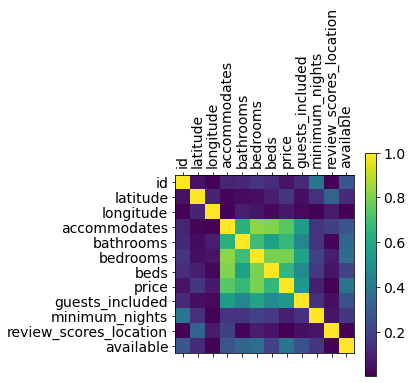

In [82]:
norte = norte[norte["available"]<=min_dias]
plt.matshow(abs(norte.corr()))
plt.xticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [83]:
sur = true_location[((true_location["latitude"]<47.60)&(true_location["longitude"]<-122.34))]
sur.plot.scatter("longitude", "latitude", s=1, c="available")

In [84]:
sur = sur[sur["available"]<=min_dias]
abs(sur.corr())

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,review_scores_location,available
id,1.000000,0.157159,0.078748,0.091199,0.076881,0.017311,0.068822,0.108921,0.000619,0.420514,0.001174,0.160685
latitude,0.157159,1.000000,0.100853,0.384820,0.293034,0.382649,0.309247,0.229997,0.317826,0.276883,0.120088,0.282796
longitude,0.078748,0.100853,1.000000,0.087506,0.063099,0.089131,0.057672,0.185984,0.039715,0.032840,0.450608,0.292937
accommodates,0.091199,0.384820,0.087506,1.000000,0.733465,0.882862,0.959392,0.736635,0.772154,0.498863,0.165896,0.422464
bathrooms,0.076881,0.293034,0.063099,0.733465,1.000000,0.849597,0.758155,0.863671,0.680567,0.483243,0.160701,0.290059
bedrooms,0.017311,0.382649,0.089131,0.882862,0.849597,1.000000,0.858082,0.798758,0.670881,0.564150,0.116621,0.428312
beds,0.068822,0.309247,0.057672,0.959392,0.758155,0.858082,1.000000,0.713208,0.703955,0.487250,0.205900,0.339122
price,0.108921,0.229997,0.185984,0.736635,0.863671,0.798758,0.713208,1.000000,0.625387,0.451910,0.304266,0.447183
guests_included,0.000619,0.317826,0.039715,0.772154,0.680567,0.670881,0.703955,0.625387,1.000000,0.571809,0.313975,0.292934
minimum_nights,0.420514,0.276883,0.032840,0.498863,0.483243,0.564150,0.487250,0.451910,0.571809,1.000000,0.283020,0.102966


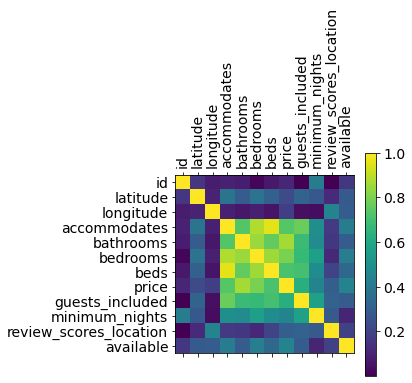

In [85]:
plt.matshow(abs(sur.corr()))
plt.xticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [86]:
centro = true_location[(true_location["latitude"]>47.61)|(true_location["longitude"]>-122.34)]
centro = centro[(centro["latitude"]<47.65)]
centro.plot.scatter("longitude", "latitude", s=1, c="available")

In [87]:
abs(centro.corr())

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,review_scores_location,available
id,1.000000,0.023959,0.025668,0.103226,0.063503,0.108513,0.098984,0.064088,0.061849,0.021818,0.113070,0.178437
latitude,0.023959,1.000000,0.656387,0.014537,0.040802,0.005579,0.017622,0.202367,0.046525,0.009768,0.381015,0.021342
longitude,0.025668,0.656387,1.000000,0.064159,0.012714,0.026815,0.033344,0.214809,0.006209,0.004442,0.273522,0.008875
accommodates,0.103226,0.014537,0.064159,1.000000,0.568654,0.765465,0.869576,0.627353,0.538434,0.014444,0.060407,0.005773
bathrooms,0.063503,0.040802,0.012714,0.568654,1.000000,0.670235,0.572153,0.528288,0.344312,0.003795,0.023097,0.035137
bedrooms,0.108513,0.005579,0.026815,0.765465,0.670235,1.000000,0.772371,0.607908,0.481169,0.001018,0.064419,0.005632
beds,0.098984,0.017622,0.033344,0.869576,0.572153,0.772371,1.000000,0.577054,0.494503,0.009212,0.047627,0.026797
price,0.064088,0.202367,0.214809,0.627353,0.528288,0.607908,0.577054,1.000000,0.433841,0.013994,0.090349,0.009526
guests_included,0.061849,0.046525,0.006209,0.538434,0.344312,0.481169,0.494503,0.433841,1.000000,0.009958,0.037713,0.045518
minimum_nights,0.021818,0.009768,0.004442,0.014444,0.003795,0.001018,0.009212,0.013994,0.009958,1.000000,0.019207,0.025106


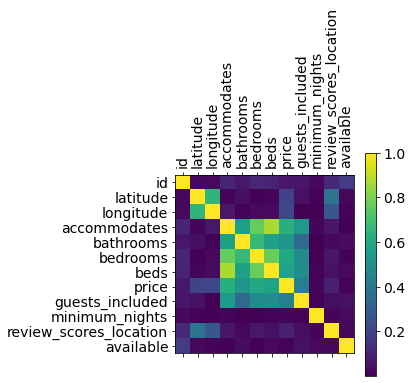

In [88]:
plt.matshow(abs(centro.corr()))
plt.xticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [89]:
def relación_alta_significativa(var_a, var_b, df, min_mag = 0.5, confianza = 0.95):
    corr, pvalor = stats.pearsonr(df[var_a], df[var_b])
    es_alta_significativa = abs(corr)>=min_mag and pvalor<=1-confianza
    return es_alta_significativa, abs(corr), pvalor

In [90]:
columnas  = centro.corr().columns

print("Norte")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=norte)[0] == True:
        print(i)

print("Centro")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=centro)[0] == True:
        print(i)

print("Sur")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=sur)[0] == True:
        print(i)

Norte
available
Centro
available
Sur
available


In [91]:
norte.isna().sum()

id                        0
neighbourhood             0
latitude                  0
longitude                 0
is_location_exact         0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
price                     0
guests_included           0
extra_people              0
minimum_nights            0
review_scores_location    0
cancellation_policy       0
available                 0
dtype: int64

Dado que se busca una locación que cumpla con que la mayoría del año este ocupado, se filtran las posiciones de acuerdo a que la disponibilidad sea menor al 20%, es decir, que este ocupado el 80% del año.

In [92]:
print("Norte")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=norte[norte["available"]<=min_dias])[0] == True:
        print(i)

print("Centro")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=centro[centro["available"]<=min_dias])[0] == True:
        print(i)

print("Sur")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=sur[sur["available"]<=min_dias])[0] == True:
        print(i)

Norte
available
Centro
available
Sur
available


In [101]:
ocupacion_minima = true_location[true_location["available"]<=min_dias]
ocupacion_minima.head()

,id,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,available
22,8942678,Queen Anne,47.635632,-122.358881,t,House,Entire home/apt,8,2.0,4.0,4.0,Real Bed,450.0,1,$0.00,4,10.0,flexible,53
33,5021081,Queen Anne,47.638121,-122.375790,t,House,Entire home/apt,7,3.5,4.0,3.0,Real Bed,222.0,7,$75.00,2,9.0,strict,2
94,6590264,Ballard,47.669874,-122.387717,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,115.0,2,$50.00,1,9.0,strict,56
113,7134759,Ballard,47.668961,-122.393877,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,60.0,1,$0.00,1,10.0,moderate,47
119,1609922,Ballard,47.671666,-122.377912,t,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,150.0,2,$10.00,4,10.0,moderate,16


In [102]:
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 11,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = ocupacion_minima[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

In [103]:
ocupacion_minima["property_type"].value_counts()

House          153
Apartment      150
Condominium     12
Townhouse       10
Name: property_type, dtype: int64

In [104]:
ocupacion_minima["bathrooms"].value_counts()

1.0    239
2.0     46
1.5     16
2.5     10
3.0      7
3.5      7
Name: bathrooms, dtype: int64

In [105]:
ocupacion_minima["bedrooms"].value_counts()

1.0    180
2.0     58
0.0     38
3.0     33
4.0     14
5.0      2
Name: bedrooms, dtype: int64

In [106]:
ocupacion_minima["beds"].value_counts()

1.0    176
2.0     83
3.0     43
4.0     11
5.0     10
6.0      2
Name: beds, dtype: int64

In [ ]:
ocupacion_minima["room_type"].value_counts()

In [ ]:
ocupacion_minima["bed_type"].value_counts()

## Precio

In [241]:
calendario.head()

,id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [242]:
calendario_precio = listado_copia.copy()
calendario_precio = calendario_precio.drop(columns=["price", "available", "is_location_exact"])
calendario = calendario.rename({'listing_id': 'id'}, axis=1)
calendario.head()

,id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [243]:
calendario_precio.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy
0,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate
1,953595,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,1,$0.00,2,10.0,strict
2,3308979,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,10,$25.00,4,10.0,strict
3,7421966,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,1,$0.00,1,NaN,flexible
4,278830,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,6,$15.00,1,9.0,strict


In [244]:
calendario_precio =  pd.merge(calendario_precio, calendario, how="inner", on=["id"])
calendario_precio = calendario_precio.dropna()
calendario_precio = calendario_precio.drop(columns="available")
calendario_precio["day_week"] = pd.DatetimeIndex(calendario_precio["date"]).dayofweek
calendario_precio.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,date,price,month,day_week
0,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-04,85.0,1,0
1,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-05,85.0,1,1
9,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-13,85.0,1,2
10,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-14,85.0,1,3
14,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-18,85.0,1,0


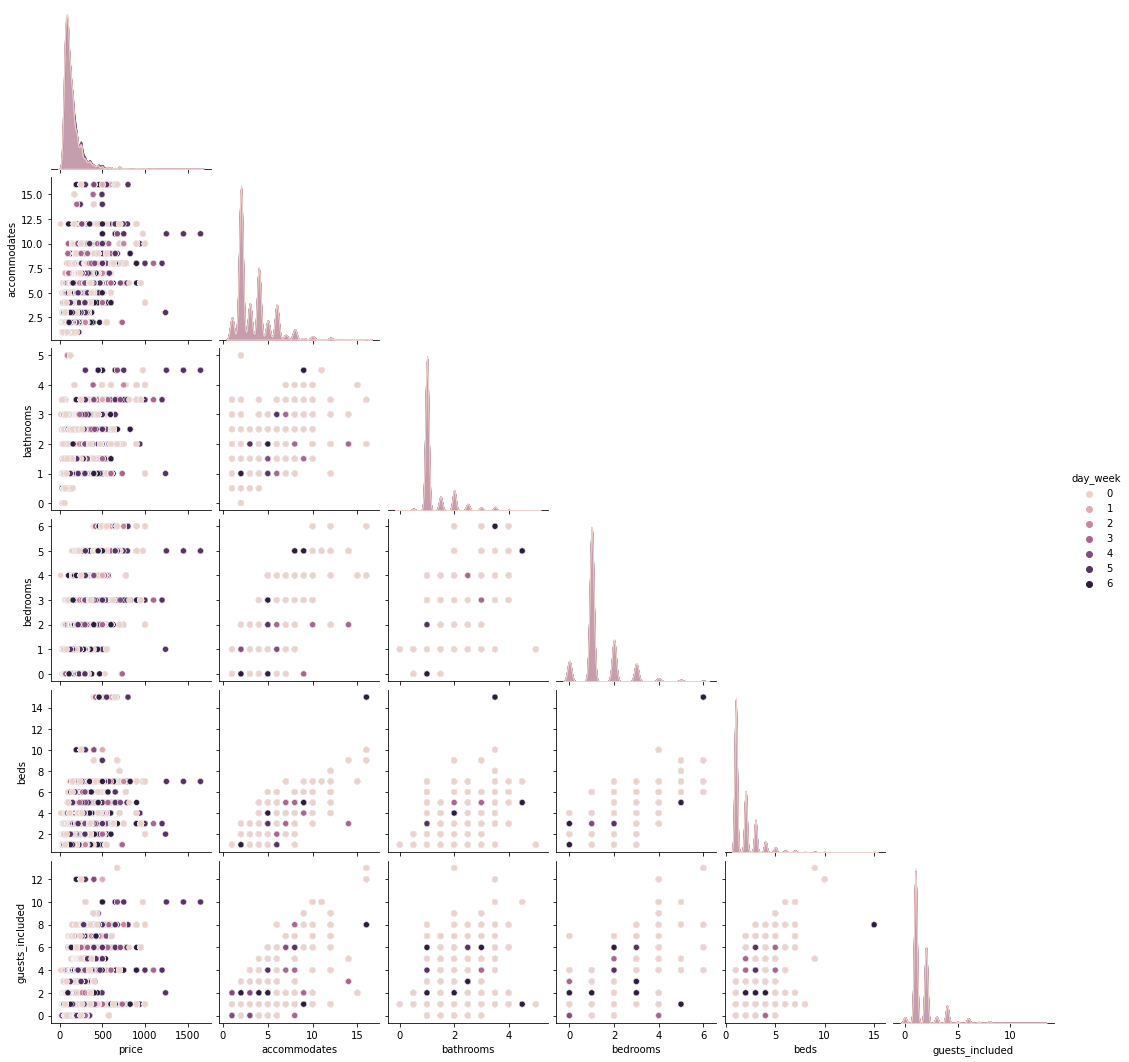

In [253]:
sns.pairplot(calendario_precio, hue="day_week", vars=["price", "accommodates", "bathrooms", "bedrooms", "beds", "guests_included"], corner=True)

In [217]:
calendario_precio.corr()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,review_scores_location,price,month
id,1.000000,0.002279,0.000491,-0.056592,-0.024510,-0.058147,-0.037070,-0.101677,-0.017548,0.116174,-0.041724,-0.001312
latitude,0.002279,1.000000,-0.160275,-0.013666,-0.024145,0.023676,0.015997,0.024112,-0.004813,0.109748,-0.010643,0.007636
longitude,0.000491,-0.160275,1.000000,-0.066699,-0.012308,-0.056921,-0.076471,-0.039197,0.005024,-0.211530,-0.110586,-0.003330
accommodates,-0.056592,-0.013666,-0.066699,1.000000,0.535718,0.776343,0.865814,0.537862,0.013199,-0.030785,0.670514,0.007205
bathrooms,-0.024510,-0.024145,-0.012308,0.535718,1.000000,0.625299,0.521213,0.285294,-0.001887,0.007186,0.556373,0.021677
bedrooms,-0.058147,0.023676,-0.056921,0.776343,0.625299,1.000000,0.767648,0.454995,0.003030,-0.017885,0.639577,0.023316
beds,-0.037070,0.015997,-0.076471,0.865814,0.521213,0.767648,1.000000,0.472708,-0.007078,-0.018967,0.617861,0.011956
guests_included,-0.101677,0.024112,-0.039197,0.537862,0.285294,0.454995,0.472708,1.000000,-0.007990,-0.026386,0.375497,-0.003982
minimum_nights,-0.017548,-0.004813,0.005024,0.013199,-0.001887,0.003030,-0.007078,-0.007990,1.000000,0.015746,0.011296,-0.000906
review_scores_location,0.116174,0.109748,-0.211530,-0.030785,0.007186,-0.017885,-0.018967,-0.026386,0.015746,1.000000,0.095512,0.006248


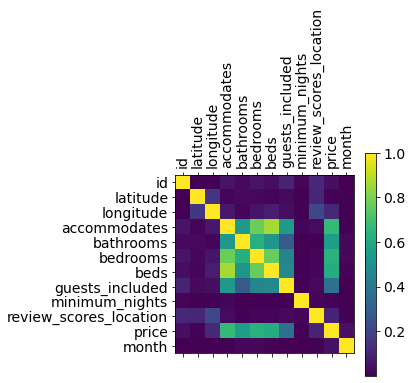

In [218]:
plt.matshow(abs(calendario_precio.corr()))
plt.xticks(range(calendario_precio.select_dtypes(['number']).shape[1]), calendario_precio.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(calendario_precio.select_dtypes(['number']).shape[1]), calendario_precio.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [219]:

calendario_precio.head()

,id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,date,price,month,day_week
0,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-04,85.0,1,Lunes
1,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-05,85.0,1,Martes
9,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-13,85.0,1,Miercoles
10,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-14,85.0,1,Jueves
14,241032,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,$5.00,1,9.0,moderate,2016-01-18,85.0,1,Lunes


array(['Apartment', 'House', 'Bungalow', 'Townhouse', 'Condominium',
       'Boat', 'Tent'], dtype=object)

In [251]:
model = sm.OLS.from_formula("price ~ accommodates + bathrooms + bedrooms + beds + day_week + room_type + property_type + neighbourhood + bed_type",
                            data=calendario_precio)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:07:14   Log-Likelihood:            -3.8267e+06
No. Observations:              680894   AIC:                         7.653e+06
Df Residuals:                  680799   BIC:                         7.655e+06
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     32.8435      1.590     20.661      0.000      29.728      35.959
room_type[T.Private room]                    -39.0195      0.233   -167.629      0.000     -39.476     -38.563
room_type[T.Shared room]                     -80.4000      0.528   -152.372      0.000     -81.434     -79.366
property_type[T.Boat]                        150.5221      2.108     71.399      0.000     146.390     154.654
property_type[T.Bungalow]                     31.0020      1.470     21.094      0.000      28.121      33.883
property_type[T.Condominium]                   9.2705      0.582     15.939      0.000       8.131      10.410
property_type[T.House]                         6.4645      0.227     28.453      0.000       6.019       6.910
property_type[T.Tent]                         -0.7647      2.339     -0.327      0.744      -5.348       3.819
property_type[T.Townhouse]                     2.1964      0.568      3.868      0.000       1.084       3.309
neighbourhood[T.Arbor Heights]               -41.2766      2.649    -15.583      0.000     -46.468     -36.085
neighbourhood[T.Atlantic]                    -59.8221      1.334    -44.853      0.000     -62.436     -57.208
neighbourhood[T.Ballard]                     -37.2728      1.179    -31.622      0.000     -39.583     -34.963
neighbourhood[T.Belltown]                     32.6902      1.195     27.352      0.000      30.348      35.033
neighbourhood[T.Bitter Lake]                 -61.1124      1.725    -35.437      0.000     -64.492     -57.732
neighbourhood[T.Brighton]                    -30.8321      2.418    -12.749      0.000     -35.572     -26.092
neighbourhood[T.Broadview]                   -58.2545      1.545    -37.710      0.000     -61.282     -55.227
neighbourhood[T.Broadway]                    -66.0506      3.095    -21.340      0.000     -72.117     -59.984
neighbourhood[T.Bryant]                      -46.7015      1.405    -33.246      0.000     -49.455     -43.948
neighbourhood[T.Capitol Hill]                  0.4182      1.174      0.356      0.722      -1.883       2.719
neighbourhood[T.Cedar Park]                  -82.1109      2.043    -40.197      0.000     -86.115     -78.107
neighbourhood[T.Central Business District]    41.5241      1.256     33.067      0.000      39.063      43.985
neighbourhood[T.Columbia City]               -59.3350      1.275    -46.533      0.000     -61.834     -56.836
neighbourhood[T.Crown Hill]                  -78.4647      1.641    -47.813      0.000     -81.681     -75.248
neighbourhood[T.Dunlap]                      -63.0027      2.054    -30.676      0.000     -67.028     -58.977
neighbourhood[T.Eastlake]                    -21.2069      1.353    -15.674      0.000

In [ ]:
0.627 "price ~ accommodates + bathrooms + bedrooms + beds + day_week + room_type + property_type + neighbourhood"
0.566 "price ~ accommodates + bathrooms + bedrooms + beds + day_week + room_type + property_type"

In [198]:
def correlacion_pearson_con_significancia(x, y, alfa=0.05):
    coef, p = stats.pearsonr(x, y)
    if p > alfa:
        return False, abs(p)
    else:
        return True, abs(p)

In [199]:
columnas = calendario_precio.select_dtypes(['number']).columns
columnas

Index(['id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights', 'review_scores_location',
       'price', 'month', 'day_week_Domingo', 'day_week_Jueves',
       'day_week_Lunes', 'day_week_Martes', 'day_week_Miercoles',
       'day_week_Sabado', 'day_week_Viernes'],
      dtype='object')

In [202]:
for i in columnas:
    tf, corr = correlacion_pearson_con_significancia(calendario_precio[i], calendario_precio["price"])
    if tf == True:
        print(i)

id
latitude
longitude
accommodates
bathrooms
bedrooms
beds
guests_included
minimum_nights
review_scores_location
price
month
day_week_Domingo
day_week_Jueves
day_week_Lunes
day_week_Martes
day_week_Miercoles
day_week_Sabado
day_week_Viernes


In [204]:
def correlacion_spearmanr_con_significancia(a, b):
    coef, p = stats.spearmanr(a, b)
    if p > 0.05:
        return False, abs(p)
    else:
        return True, abs(p)

In [205]:
for i in columnas:
    tf, corr = correlacion_spearmanr_con_significancia(calendario_precio[i], calendario_precio["price"])
    if tf == True:
        print(i)

id
latitude
longitude
accommodates
bathrooms
bedrooms
beds
guests_included
minimum_nights
review_scores_location
price
month
day_week_Domingo
day_week_Jueves
day_week_Lunes
day_week_Martes
day_week_Miercoles
day_week_Sabado
day_week_Viernes


In [206]:
def correlacion_kendal_con_significancia(a, b):
    coef, p = stats.kendalltau(a, b)
    if p > 0.05/2.0:
          return False, abs(p)
    else:
          return True, abs(p)

In [207]:
for i in columnas:
    tf, corr = correlacion_kendal_con_significancia(calendario_precio[i], calendario_precio["price"])
    if tf == True:
        print(i)

id
latitude
longitude
accommodates
bathrooms


C:\Users\Camilo\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning:

overflow encountered in longlong_scalars



bedrooms
beds
guests_included
minimum_nights
review_scores_location
price
month
day_week_Domingo
day_week_Jueves
day_week_Lunes
day_week_Martes
day_week_Miercoles
day_week_Sabado
day_week_Viernes
